In [8]:
import torch
import matplotlib.pyplot as plt

file_path='logs/dinov2_backbone_dinov2_large/lightning_logs/version_22/neg_num_list.pth'
neg_num_list=torch.load(file_path)

print(len(neg_num_list))

4885


In [11]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# 设置采样间隔
sample_interval=50
start_index=1000

without_neg_num_list=[]
with_neg_num_list=[]
for i in range(start_index, len(neg_num_list), sample_interval):
    without_neg_num_list.append(neg_num_list[i][0])
    with_neg_num_list.append(neg_num_list[i][1])

print(len(without_neg_num_list))
print(len(with_neg_num_list))



78
78


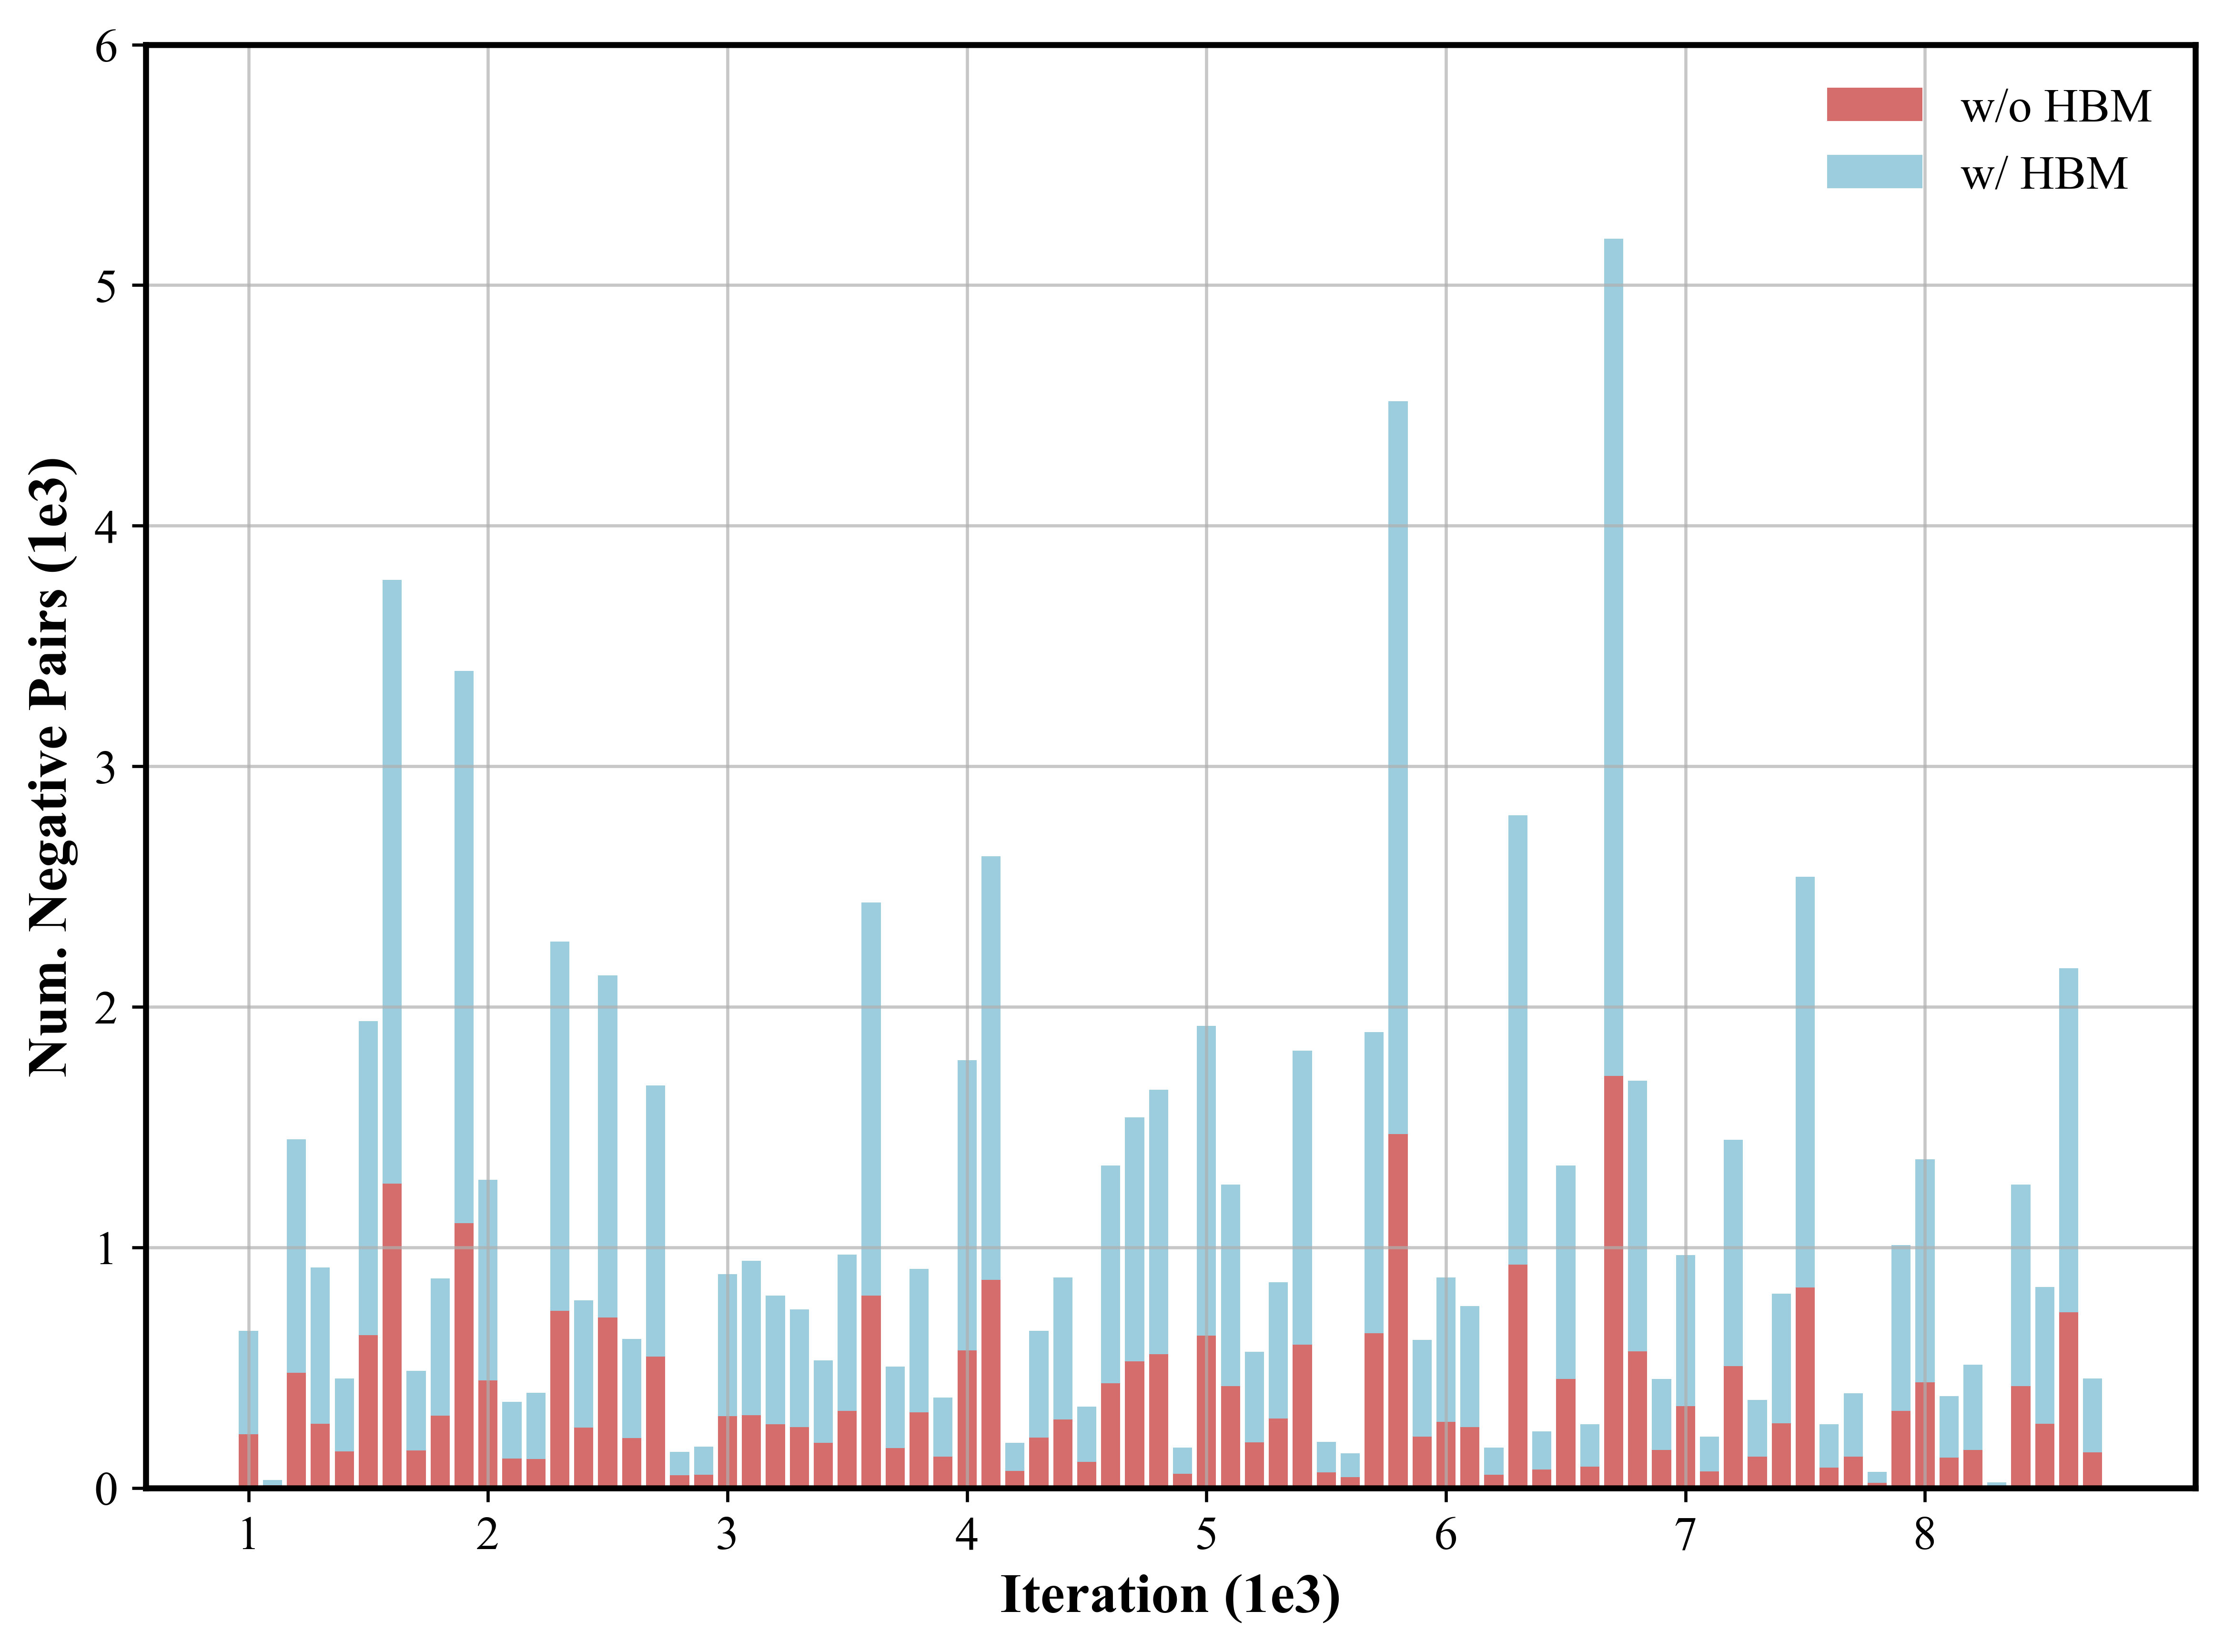

In [13]:

import torch
import matplotlib.pyplot as plt
import numpy as np

# Set global font and style
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 14,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.linewidth': 1.2,
    'lines.linewidth': 2.5,
    'lines.markersize': 10,
    'grid.linewidth': 0.8,
})

# Create figure
plt.figure(figsize=(8, 6), dpi=600)

# Draw stacked bar chart
x = np.arange(len(without_neg_num_list))
plt.bar(x, without_neg_num_list, label='w/o HBM', 
        color='#d46d6b', linewidth=1.2)
plt.bar(x, with_neg_num_list, bottom=without_neg_num_list, 
        label='w/ HBM', color='#9bcdde', 
        linewidth=1.2)

# 自定义x轴刻度和标签
x_ticks = np.arange(0, len(without_neg_num_list), 10)  # 每隔5个显示一个刻度
x_labels = [f'{ int((i+10)*0.1)}' for i in x_ticks]  # 自定义标签内容
plt.xticks(x_ticks, x_labels)

# 自定义y轴刻度和标签
y_ticks = plt.yticks()[0]  # 获取当前y轴刻度
y_labels = [f'{int(y/1000)}' for y in y_ticks]  # 将刻度值除以1000
plt.yticks(y_ticks, y_labels)

# Add labels
plt.xlabel('Iteration (1e3)', fontweight='bold')
plt.ylabel('Num. Negative Pairs (1e3)', fontweight='bold')
plt.legend(frameon=False, framealpha=1, edgecolor='black')

# Add grid
plt.grid(True, linestyle='-', alpha=0.7)

# Set border width
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)

# Adjust layout and display
plt.tight_layout()
plt.savefig('some_result_images/neg_num_list_hbm.png', dpi=600)
plt.show()
